# Validate Extraction Results of the CORD 200k Corpus with DrugBank

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import ast

In [2]:
df = pd.read_csv('cross_checked_combined_body_extraction_results_all.csv', header=0)
df.head()

,Entity,Keras-count,SpaCy-count,Total-count
0,oxygen,90544.0,20556,111100
1,ribavirin,30356.0,31707,62063
2,chloroquine,28497.0,30802,59299
3,hydroxychloroquine,30532.0,27085,57617
4,remdesivir,21474.0,23250,44724


In [3]:
df_db = pd.read_csv('drugbank-parsed.csv', header=0, index_col=0)
df_db.head()

,type,drugbank_id,name,description,groups,atc_codes,categories,inchi,inchikey,aliases
0,biotech,DB00001,Lepirudin,Lepirudin is identical to natural hirudin exce...,['approved'],['B01AE02'],"['Amino Acids, Peptides, and Proteins', 'Antic...",NaN,NaN,"['Lepirudin', 'Refludan']"
1,biotech,DB00002,Cetuximab,Cetuximab is an epidermal growth factor recept...,['approved'],['L01XC06'],"['Amino Acids, Peptides, and Proteins', 'Antib...",NaN,NaN,"['Cetuximab', 'Erbitux']"
2,biotech,DB00003,Dornase alfa,Dornase alfa is a biosynthetic form of human d...,['approved'],['R05CB13'],"['Amino Acids, Peptides, and Proteins', 'Cough...",NaN,NaN,"['\n ', 'Dornase alfa', 'Pulmozyme', 'Pul..."
3,biotech,DB00004,Denileukin diftitox,A recombinant DNA-derived cytotoxic protein co...,"['approved', 'investigational']",['L01XX29'],"['ADP Ribose Transferases', 'Amino Acids, Pept...",NaN,NaN,"['Denileukin diftitox', 'Ontak']"
4,biotech,DB00005,Etanercept,Dimeric fusion protein consisting of the extra...,"['approved', 'investigational']",['L04AB01'],"['Agents reducing cytokine levels', 'Amino Aci...",NaN,NaN,"['\n ', 'Brenzys', 'Enbrel', 'Erelzi', 'E..."


In [4]:
print(len(df_db))
df_db = df_db[df_db['atc_codes']!='[]']
print(len(df_db))

12112
2650


In [5]:
drug_names_lowercase = [drug.strip().lower() for drug in df_db['name']]
_d = [drug.split(' ') for drug in drug_names_lowercase]
drug_words_lowercase = [drug for drug in list(itertools.chain.from_iterable(_d))]
drug_names_lowercase_dict = dict.fromkeys(drug_names_lowercase, "T")
drug_words_lowercase_dict = dict.fromkeys(drug_words_lowercase, "T")

_a = [ast.literal_eval(l) for l in list(df_db['aliases'])]
alias_names_lowercase = [x.lower() for x in list(itertools.chain.from_iterable(_a)) if x[0] != '\\']
_a = [alias.split(' ') for alias in alias_names_lowercase]
alias_words_lowercase = [alias for alias in list(itertools.chain.from_iterable(_a))]
alias_names_lowercase_dict = dict.fromkeys(alias_names_lowercase, 'T')
alias_words_lowercase_dict = dict.fromkeys(alias_words_lowercase, 'T')

all_names_lowercase_set = set(drug_names_lowercase_dict).union(set(alias_names_lowercase_dict))
all_words_lowercase_set = set(drug_words_lowercase_dict).union(set(alias_words_lowercase_dict))

In [6]:
def percentage_in_drugbank(l: list) -> tuple:
    name_overlap = set(l).intersection(all_names_lowercase_set)
    word_overlap = set(l).intersection(all_words_lowercase_set)
    return name_overlap, word_overlap

In [7]:
name_overlap_total = list()
word_overlap_total = list()
num_range = range(100, 1001, 100)
for num in num_range:
    name_overlap, word_overlap = percentage_in_drugbank(df['Entity'][:num])
    name_overlap_total.append(len(name_overlap)/num*100)
    word_overlap_total.append(len(word_overlap)/num*100)

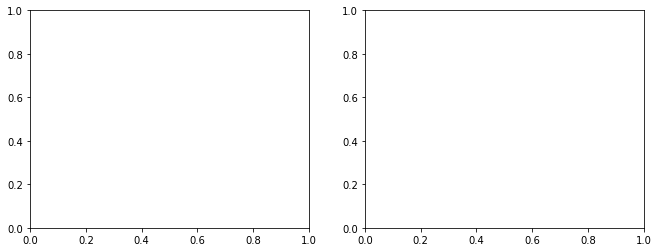

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11,4))

In [9]:
ax1.plot(num_range, name_overlap_total, 'o-', label='Full match')
ax1.plot(num_range, word_overlap_total, '^-', label="Partial match")
ax1.set_xlabel('Top candidates')
ax1.set_ylabel('Percent(%)')
ax1.set_xticks(range(100, 1001, 100))
ax1.text(0.5,-0.25, "(a) All Entities", size=12, ha="center", transform=ax1.transAxes)
ax1.legend(loc='best')
print(name_overlap_total)
print(word_overlap_total)

[77.0, 72.5, 65.33333333333333, 61.75000000000001, 59.199999999999996, 55.833333333333336, 54.0, 51.625, 50.44444444444445, 48.0]
[86.0, 82.5, 77.0, 75.0, 72.2, 70.16666666666667, 68.71428571428572, 66.375, 65.33333333333333, 63.0]


In [10]:
print(len(df))
df2 = df[(0.1 < df['Keras-count']/df['SpaCy-count']) & (df['Keras-count']/df['SpaCy-count'] < 10)]
print(len(df2))

122779
10580


In [11]:
name_overlap_balanced = list()
word_overlap_balanced = list()
num_range = range(100, 1001, 100)
for num in num_range:
    name_overlap, word_overlap = percentage_in_drugbank(df2['Entity'][:num])
    name_overlap_balanced.append(len(name_overlap)/num*100)
    word_overlap_balanced.append(len(word_overlap)/num*100)

In [12]:
ax2.plot(num_range, name_overlap_balanced, 'o-', label='Full match')
ax2.plot(num_range, word_overlap_balanced, '^-', label="Partial match")
ax2.set_xlabel('Top candidates')
ax2.set_ylabel('Percent(%)')
ax2.set_xticks(range(100, 1001, 100))
ax2.legend(loc='best')
ax2.text(0.5,-0.25, "(b) Balanced Entities", size=12, ha="center", transform=ax2.transAxes)
print(name_overlap_balanced)
print(word_overlap_balanced)

[88.0, 84.5, 81.33333333333333, 79.75, 76.2, 73.5, 72.57142857142857, 70.625, 68.55555555555556, 65.7]
[91.0, 87.5, 84.66666666666667, 83.0, 80.80000000000001, 78.0, 76.71428571428571, 74.75, 72.66666666666667, 69.6]


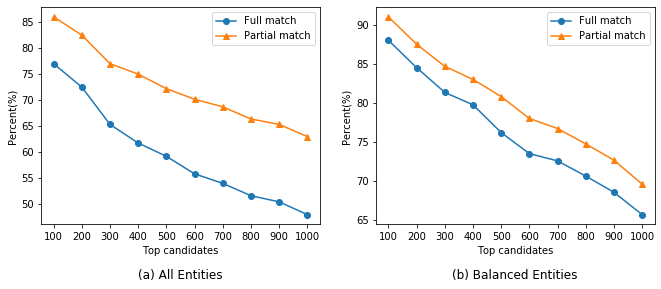

In [13]:
fig

In [15]:
fig.savefig('cmp_to_drugbank.pdf', 
            bbox_inches = "tight") # set bbox_inches to 'tight' to avoid bottom texts being chopped off